In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
csv_paths = "../data/raw/csvfiles"
csv_files = [f"{csv_paths}/{f}" for f in os.listdir(csv_paths) if f.endswith('.csv')]
print(f"Found {len(csv_files)} CSV files.")

Found 7 CSV files.


In [3]:
dfs = [pd.read_csv(fp) for fp in csv_files]
len(dfs)

7

In [4]:
for i, df in enumerate(dfs):
    dfs[i].columns = [col.strip() for col in dfs[i].columns]  # clean spaces

In [5]:
for i, df in enumerate(dfs):
    df["Source Section"] = f"Section {i+1}"

In [6]:
full_df = pd.concat(dfs, ignore_index=True)

In [7]:
full_df = full_df.drop_duplicates(subset=["HTS Number", "Description"], keep="first")

In [8]:
full_df.to_csv(f"{csv_paths}/combined_hts_data.csv", index=False)

In [9]:
final_df = pd.read_csv(f"{csv_paths}/combined_hts_data.csv")
print(f"Final DataFrame shape: {final_df.shape}")

Final DataFrame shape: (1718, 20)


In [10]:
final_df.isnull().sum()

HTS Number                            168
Indent                                168
Description                             0
Unit of Quantity                      602
General Rate of Duty                 1011
Special Rate of Duty                 1301
Column 2 Rate of Duty                1011
Quota Quantity                       1718
Additional Duties                    1718
Source Section                          0
CIF Value                            1550
Product Cost                         1550
Freight                              1550
Insurance                            1550
General Rate of Duty Parsed (%)      1550
General Rate of Duty Duty Amount     1550
Special Rate of Duty Parsed (%)      1550
Special Rate of Duty Duty Amount     1550
Column 2 Rate of Duty Parsed (%)     1550
Column 2 Rate of Duty Duty Amount    1550
dtype: int64

In [11]:
final_df.duplicated().sum()

np.int64(0)

In [12]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   HTS Number                         1550 non-null   object 
 1   Indent                             1550 non-null   float64
 2   Description                        1718 non-null   object 
 3   Unit of Quantity                   1116 non-null   object 
 4   General Rate of Duty               707 non-null    object 
 5   Special Rate of Duty               417 non-null    object 
 6   Column 2 Rate of Duty              707 non-null    object 
 7   Quota Quantity                     0 non-null      float64
 8   Additional Duties                  0 non-null      float64
 9   Source Section                     1718 non-null   object 
 10  CIF Value                          168 non-null    float64
 11  Product Cost                       168 non-null    float

In [13]:
#1. Forward-fill Missing HTS Codes
final_df["HTS Number"] = final_df["HTS Number"].fillna(method="ffill")

C:\Users\12345\AppData\Local\Temp\ipykernel_15300\1636835538.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_df["HTS Number"] = final_df["HTS Number"].fillna(method="ffill")


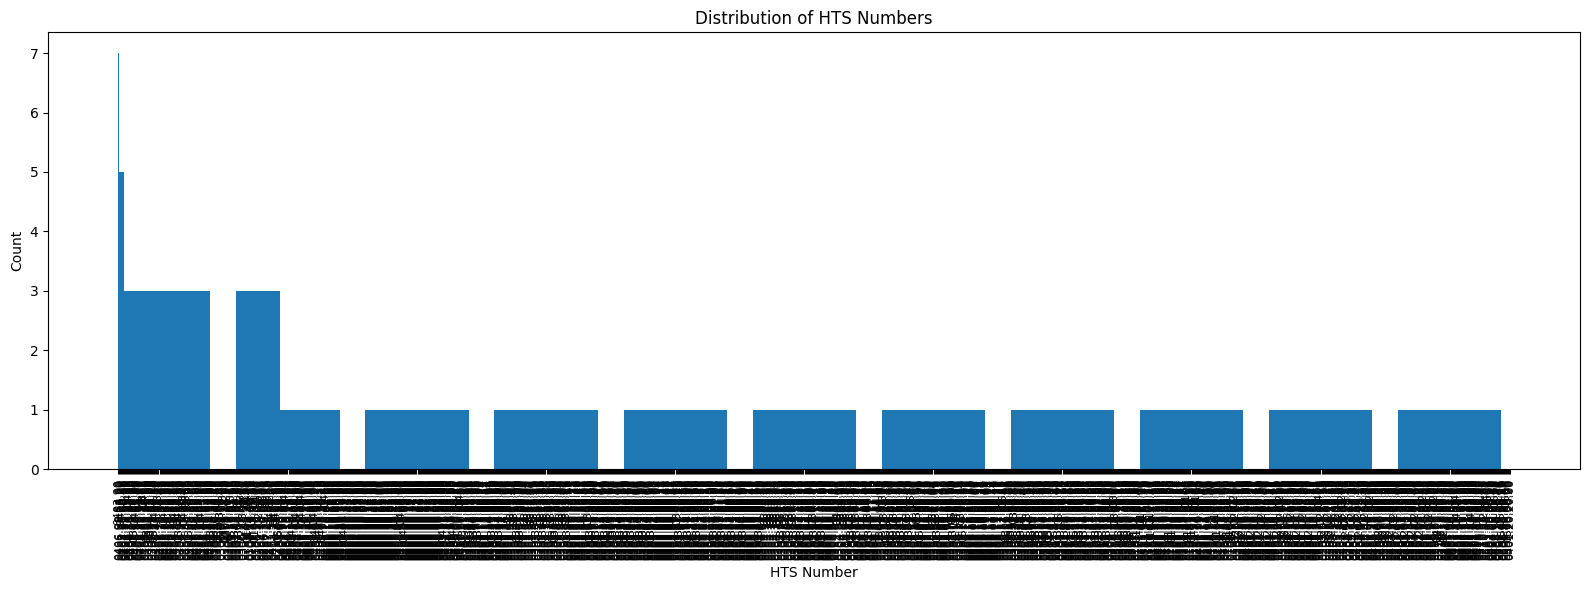

In [14]:
# Plot the distribution of HTS Numbers
hts_counts = final_df['HTS Number'].value_counts()
plt.figure(figsize=(16, 6))
plt.bar(hts_counts.index.astype(str), hts_counts.values)
plt.xlabel('HTS Number')
plt.ylabel('Count')
plt.title('Distribution of HTS Numbers')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

In [15]:
#2. Parse Unit of Quantity
import ast

def clean_unit_of_quantity(val):
    if pd.isna(val):
        return "Not Given"  # handle NaN values
    try:
        return ast.literal_eval(val)  # safely convert string to list
    except:
        return val  # fallback in case it's not a proper list string

In [16]:
final_df["Unit of Quantity"] = final_df["Unit of Quantity"].apply(clean_unit_of_quantity)

In [17]:
final_df.head()

,HTS Number,Indent,Description,Unit of Quantity,General Rate of Duty,Special Rate of Duty,Column 2 Rate of Duty,Quota Quantity,Additional Duties,Source Section,CIF Value,Product Cost,Freight,Insurance,General Rate of Duty Parsed (%),General Rate of Duty Duty Amount,Special Rate of Duty Parsed (%),Special Rate of Duty Duty Amount,Column 2 Rate of Duty Parsed (%),Column 2 Rate of Duty Duty Amount
0,0401,0.0,"Milk and cream, not concentrated nor containin...",Not Given,NaN,NaN,NaN,NaN,NaN,Section 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0401.10.00.00,1.0,"Of a fat content, by weight, not exceeding 1 p...","[liters, kg]",0.34¢/liter,"Free (A+,AU,BH,CL,CO,D,E,IL,JO,KR,MA,OM,P,PA,P...",0.5¢/liter,NaN,NaN,Section 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0401.20,1.0,"Of a fat content, by weight, exceeding 1 perce...",Not Given,NaN,NaN,NaN,NaN,NaN,Section 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0401.20.20.00,2.0,"For not over 11,356,236 liters entered in any ...","[liters, kg cmsc]",0.43¢/liter,"Free (A+,AU,BH,CL,CO,D,E,IL,JO,KR,MA,OM,P,PA,P...",1.7¢/liter,NaN,NaN,Section 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0401.20.40.00,2.0,Other,"[liters, kg cmsc]",1.5¢/liter,"Free (AU,BH,CL,CO,IL,JO,KR,MA,OM,P,PA,PE,S,SG)",1.7¢/liter,NaN,NaN,Section 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
import re

def normalize_duty_rate(rate):
    if pd.isna(rate):
        return {"rate": 0.0, "type": "None"}
    
    rate = str(rate).strip().lower()
    if "free" in rate:
        return {"rate": 0.0, "type": "Free"}

    # Percentage
    if "%" in rate:
        match = re.search(r"([\d.]+)\s*%", rate)
        if match:
            return {"rate": float(match.group(1)), "type": "%"}

    # Cents per kg
    if "¢/kg" in rate:
        match = re.search(r"([\d.]+)\s*¢/kg", rate)
        if match:
            return {"rate": float(match.group(1)), "type": "¢/kg"}

    # Dollar per unit
    if "$" in rate and "/unit" in rate:
        match = re.search(r"\$([\d.]+)\s*/unit", rate)
        if match:
            return {"rate": float(match.group(1)), "type": "$/unit"}

    return {"rate": 0.0, "type": "Unknown"}


In [19]:
# Apply to each duty column
for col in ["General Rate of Duty", "Column 2 Rate of Duty"]:
    final_df[f"{col} Parsed"] = final_df[col].apply(normalize_duty_rate)

In [20]:
# final_df.head()

In [21]:
def parse_special_rate(rate_str):
    if pd.isna(rate_str):
        return {"is_free": False, "countries": []}
    
    rate_str = str(rate_str)
    if "Free" in rate_str:
        match = re.search(r"Free\s*\((.*?)\)", rate_str)
        if match:
            countries = [c.strip() for c in match.group(1).split(",")]
            return {"is_free": True, "countries": countries}
        else:
            return {"is_free": True, "countries": []}
    
    return {"is_free": False, "countries": []}

In [22]:
final_df["Special Rate Parsed"] = final_df["Special Rate of Duty"].apply(parse_special_rate)

In [23]:
final_df["Is Special Free"] = final_df["Special Rate Parsed"].apply(lambda x: x["is_free"])
final_df["Special Countries"] = final_df["Special Rate Parsed"].apply(lambda x: ", ".join(x["countries"]))

In [24]:
final_df['Quota Quantity'].unique() # All NaN, so we can drop this column
final_df = final_df.drop(columns=['Quota Quantity'], axis=1)

In [25]:
final_df['Additional Duties'].unique()  # Check unique values
## All NaN, so we can drop this column
final_df = final_df.drop(columns=['Additional Duties'], axis=1)

In [26]:
# Input values
product_cost = 10000.0  # FOB cost
freight = 500.0
insurance = 100.0
unit_weight = 1000  # in kg
quantity = 10       # number of units

# Compute CIF
cif_value = product_cost + freight + insurance

# Duty parser
def parse_duty_advanced(duty_str, unit_weight=None, quantity=None):
    """
    Parses and returns a duty rate as a decimal fraction (e.g., 0.05 for 5%),
    or a calculated specific duty based on unit_weight or quantity.
    """
    if pd.isna(duty_str) or duty_str.strip() == "":
        return 0.0

    duty_str = duty_str.strip().lower()

    if "free" in duty_str:
        return 0.0

    # Percentage duty (e.g., '5%')
    match = re.search(r"([\d.]+)\s*%", duty_str)
    if match:
        return float(match.group(1)) / 100

    # Weight-based duty (e.g., '2.5¢/kg')
    match = re.search(r"([\d.]+)\s*¢/kg", duty_str)
    if match and unit_weight is not None:
        cents_per_kg = float(match.group(1))
        return (cents_per_kg * unit_weight) / (100 * cif_value)  # convert to % of CIF

    # Unit-based duty (e.g., '$1.00/unit')
    match = re.search(r"\$([\d.]+)/unit", duty_str)
    if match and quantity is not None:
        dollars_per_unit = float(match.group(1))
        return (dollars_per_unit * quantity) / cif_value

    return 0.0

# Create working DataFrame
duty_df = final_df[["HTS Number", "Description", "General Rate of Duty", 
              "Special Rate of Duty", "Column 2 Rate of Duty"]].copy()

# Apply CIF and input data
duty_df["CIF Value"] = cif_value
duty_df["Product Cost"] = product_cost
duty_df["Freight"] = freight
duty_df["Insurance"] = insurance

# Apply duty calculations
for col in ["General Rate of Duty", "Special Rate of Duty", "Column 2 Rate of Duty"]:
    parsed_col = f"{col} Parsed (%)"
    amount_col = f"{col} Duty Amount"
    duty_df[parsed_col] = duty_df[col].apply(lambda x: parse_duty_advanced(x, unit_weight, quantity))
    duty_df[amount_col] = duty_df[parsed_col] * cif_value

# Filter results with any applicable duty
duty_df_filtered = duty_df[
    (duty_df["General Rate of Duty Duty Amount"] > 0) |
    (duty_df["Special Rate of Duty Duty Amount"] > 0) |
    (duty_df["Column 2 Rate of Duty Duty Amount"] > 0)
]


In [27]:
# Droping columns that are not needed
final_duty_df = duty_df.drop(columns=[
    "General Rate of Duty", "Special Rate of Duty", "Column 2 Rate of Duty"
], axis=1)

In [28]:
# final_df.sample()
# concat final_duty_df with final_df[['Indent', 'Unit of Quantity', 'Is Special Free', 'Special Countries']]
temp_df = final_df[['Indent', 'Unit of Quantity', 'Is Special Free', 'Special Countries']].copy()
final_duty_df = pd.concat([final_duty_df, temp_df], axis=1)
final_duty_df.shape

(1718, 16)

In [29]:
final_duty_df.sample()

,HTS Number,Description,CIF Value,Product Cost,Freight,Insurance,General Rate of Duty Parsed (%),General Rate of Duty Duty Amount,Special Rate of Duty Parsed (%),Special Rate of Duty Duty Amount,Column 2 Rate of Duty Parsed (%),Column 2 Rate of Duty Duty Amount,Indent,Unit of Quantity,Is Special Free,Special Countries
346,0406.90.88.00,Other,10600.0,10000.0,500.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,"[kg, kg cmsc]",True,"BH, CL, JO, MA, OM, P, PE, SG"


In [30]:
final_duty_df['HTS Number'].nunique()  # Check unique HTS Numbers

1382

In [31]:
## Save the final DataFrame
final_duty_df.to_csv(f"{csv_paths}/final_hts_duty_data.csv", index=False)
print("Final HTS duty data saved successfully.")

Final HTS duty data saved successfully.


### Storing csv into DuckDB

In [32]:
import duckdb

In [33]:
conn = duckdb.connect("../data/processed/hts_data.duckdb")  # Creates or opens a physical DB file

In [34]:
conn.execute("DROP TABLE IF EXISTS hts_data")  # Avoid duplicates

In [35]:
conn.register("df", final_duty_df)

In [36]:
conn.execute("CREATE TABLE hts_data AS SELECT * FROM df")

In [37]:
print("✅ CSVs successfully loaded into hts_data.duckdb")

✅ CSVs successfully loaded into hts_data.duckdb


In [38]:
results = conn.execute("""
    SELECT * FROM hts_data WHERE Description ILIKE '%cheese%'
""").df()
results.head()


,HTS Number,Description,CIF Value,Product Cost,Freight,Insurance,General Rate of Duty Parsed (%),General Rate of Duty Duty Amount,Special Rate of Duty Parsed (%),Special Rate of Duty Duty Amount,Column 2 Rate of Duty Parsed (%),Column 2 Rate of Duty Duty Amount,Indent,Unit of Quantity,Is Special Free,Special Countries
0,0406,Cheese and curd:,10600.0,10000.0,500.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Given,False,
1,0406.10,"Fresh (unripened or uncured) cheese, including...",10600.0,10000.0,500.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Not Given,False,
2,0406.10.12.00,Blue-mold cheese and cheese and substitutes fo...,10600.0,10000.0,500.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,Not Given,False,
3,0406.10.18.00,"Cheddar cheese, and cheese and substitutes for...",10600.0,10000.0,500.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,Not Given,False,
4,0406.10.28.00,"American-type cheese, including Colby, washed ...",10600.0,10000.0,500.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,Not Given,False,


In [39]:
results.shape

(89, 16)

In [41]:
query = """
SELECT 
    * 
FROM 
    hts_data
WHERE 
    "HTS Number" = '0406.90.88.00';

"""
results = conn.execute(query).df()
results.head()

,HTS Number,Description,CIF Value,Product Cost,Freight,Insurance,General Rate of Duty Parsed (%),General Rate of Duty Duty Amount,Special Rate of Duty Parsed (%),Special Rate of Duty Duty Amount,Column 2 Rate of Duty Parsed (%),Column 2 Rate of Duty Duty Amount,Indent,Unit of Quantity,Is Special Free,Special Countries
0,0406.90.88.00,Other,10600.0,10000.0,500.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,"['kg', 'kg cmsc']",True,"BH, CL, JO, MA, OM, P, PE, SG"
1,0406.90.88.00,"Containing, or processed from, Swiss, Emmental...",10600.0,10000.0,500.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,Not Given,False,
2,0406.90.88.00,"Containing, or processed from, Swiss, Emmental...",10600.0,10000.0,500.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Not Given,False,


In [42]:
results = conn.execute("""
                       SELECT * from hts_data;""").df()
results.columns

Index(['HTS Number', 'Description', 'CIF Value', 'Product Cost', 'Freight',
       'Insurance', 'General Rate of Duty Parsed (%)',
       'General Rate of Duty Duty Amount', 'Special Rate of Duty Parsed (%)',
       'Special Rate of Duty Duty Amount', 'Column 2 Rate of Duty Parsed (%)',
       'Column 2 Rate of Duty Duty Amount', 'Indent', 'Unit of Quantity',
       'Is Special Free', 'Special Countries'],
      dtype='object')

In [ ]:
def run_duckdb_query(query):
    """
    Executes the given SQL query using the existing DuckDB connection and returns the result as a DataFrame.
    """
    return conn.execute(query).df()